In [2]:
# 메모리 변수 모두 제거
all = [var for var in globals() if var[0] != "_"]
for var in all:
    del globals()[var]

# 메모리 변수 확인
#globals()

In [3]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings(action='ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')

In [4]:
df3 = pd.read_csv('data/메뉴구분3.csv')

In [5]:
df3.head(2)

,일자,밥,국,메인,반찬,구분,국분류,메뉴분류
0,2016-02-01,밥,오징어찌개,쇠불고기,계란찜,중식,찌개,육류
1,2016-02-02,밥,김치찌개,가자미튀김,모둠소세지구이,중식,찌개,해산물


In [6]:
df_lunch_cat = df3.iloc[:1205]
df_dinner_cat = df3.iloc[1205:]

In [7]:
df_lunch_cat['반찬'][1]


'모둠소세지구이'

## 카테고리 리스트화

In [8]:
lunch_menu = []
for i in range(len(df_lunch_cat)):
    lunch_menu.append([df_lunch_cat['국분류'][i], df_lunch_cat['메뉴분류'][i]])   

In [9]:
df_dinner_cat['국분류'][1205]

'국'

In [10]:
df_dinner_cat.reset_index(inplace=True) #

In [11]:
dinner_menu = []
for i in range(len(df_dinner_cat)):
    dinner_menu.append([df_dinner_cat['국분류'][i], df_dinner_cat['메뉴분류'][i]])   

## 점심

In [12]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

te = TransactionEncoder()
te_ary = te.fit(lunch_menu).transform(lunch_menu)
lunch_te = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets_lunch =apriori(lunch_te,min_support=0.001,use_colnames=True)
print(frequent_itemsets_lunch.sort_values('support', ascending=False)[:5])

     support itemsets
0   0.593361      (국)
4   0.540249     (육류)
10  0.326971  (육류, 국)
8   0.224896    (해산물)
5   0.176763     (조류)


In [13]:
frequent_itemsets_lunch['length'] = frequent_itemsets_lunch['itemsets'].apply(lambda x: len(x))   # 개수열 추가
frequent_itemsets_lunch[frequent_itemsets_lunch['length'] >=2] .sort_values('support', ascending=False)[:5] #2개 이상
# support는 자주 나왔던 것들의 조합

,support,itemsets,length
10,0.326971,"(육류, 국)",2
12,0.118672,"(해산물, 국)",2
11,0.112033,"(국, 조류)",2
20,0.086307,"(육류, 탕)",2
19,0.082988,"(찌개, 육류)",2


In [14]:
rules_lunch=association_rules(frequent_itemsets_lunch, metric="lift", min_threshold=1)
rules_lunch.sort_values('lift', ascending=False)[:5]
# lift가 높다는 뜻은 국수가 나오면 꼭 기타종류의 음식이 나오더라

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6,(국수),(기타),0.067220,0.058091,0.005809,0.086420,1.487654,0.001904,1.031008
7,(기타),(국수),0.058091,0.067220,0.005809,0.100000,1.487654,0.001904,1.036422
11,(기타),(탕),0.058091,0.173444,0.013278,0.228571,1.317840,0.003202,1.071462
10,(탕),(기타),0.173444,0.058091,0.013278,0.076555,1.317840,0.003202,1.019994
15,(해산물),(찌개),0.224896,0.164315,0.047303,0.210332,1.280051,0.010349,1.058274


## 저녁

In [15]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

te = TransactionEncoder()
te_ary = te.fit(dinner_menu).transform(dinner_menu)
dinner_te = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets_dinner =apriori(lunch_te,min_support=0.001,use_colnames=True)
print(frequent_itemsets_dinner.sort_values('support', ascending=False)[:5])

     support itemsets
0   0.593361      (국)
4   0.540249     (육류)
10  0.326971  (육류, 국)
8   0.224896    (해산물)
5   0.176763     (조류)


In [16]:
frequent_itemsets_dinner['length'] = frequent_itemsets_dinner['itemsets'].apply(lambda x: len(x))   # 개수열 추가
frequent_itemsets_dinner[frequent_itemsets_dinner['length'] >=2] .sort_values('support', ascending=False).head(2) #2개 이상
# support는 자주 나왔던 것들의 조합

,support,itemsets,length
10,0.326971,"(육류, 국)",2
12,0.118672,"(해산물, 국)",2


In [17]:
rules_dinner=association_rules(frequent_itemsets_dinner, metric="lift", min_threshold=1)
rules_dinner.sort_values('support', ascending=False)[:5]
# lift가 높다는 뜻은 국수가 나오면 꼭 기타종류의 음식이 나오더라
# confidence 는 국수중 기타가 포함될 확률
# supoort 는 나올 확률

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(육류),(국),0.540249,0.593361,0.326971,0.605223,1.019991,0.006408,1.030047
3,(국),(육류),0.593361,0.540249,0.326971,0.551049,1.019991,0.006408,1.024056
4,(국),(조류),0.593361,0.176763,0.112033,0.188811,1.068157,0.007149,1.014852
5,(조류),(국),0.176763,0.593361,0.112033,0.633803,1.068157,0.007149,1.110437
14,(찌개),(해산물),0.164315,0.224896,0.047303,0.287879,1.280051,0.010349,1.088444


## 시각화

## 점심

In [18]:
df = pd.read_csv('data/train_메뉴제외.csv')

In [19]:
df = df[['일자', '요일', '중식계', '석식계', '중식강수여부', '석식강수여부', '중식기온', '석식기온']]
df.head(2)

,일자,요일,중식계,석식계,중식강수여부,석식강수여부,중식기온,석식기온
0,2016-02-01,월,1039.0,331.0,0.0,0.0,3.0,0.9
1,2016-02-02,화,867.0,560.0,0.0,0.0,1.7,2.4


In [20]:
df_lunch = pd.concat([df,df_lunch_cat[['국분류', '메뉴분류']]],axis=1)
avg = np.average(df_lunch['중식계']) ##중식의 평균 식수량을 구한다
np.average(df_lunch[(df_lunch.국분류=='국수') & (df_lunch.메뉴분류 == '육류')]['중식계']) # 국수와 육류가 나오면 중식계의 평균이 늘어납니다. 


df_lunch_mean = df_lunch['중식계'].groupby([df_lunch['메뉴분류'], df_lunch['국분류']]).mean()
df_lunch_mean = pd.DataFrame(df_lunch_mean)
df_lunch_mean_menu = pd.DataFrame(df_lunch['중식계'].groupby(df_lunch['메뉴분류']).mean())
df_lunch_mean_guk = pd.DataFrame(df_lunch['중식계'].groupby(df_lunch['국분류']).mean())
df_lunch_mean.head(2)

중식계
메뉴분류 국분류            
기타   국    863.558140
     국수   960.571429

In [21]:
#df_lunch_mean.plot(figsize=(40,10), xticks=range(len(df_lunch_mean)))
#df_lunch_mean.loc['기타','국'] # 다중인덱스 인덱싱 하는법

In [22]:
def cal_anco(colum, df_rules, df_meal_mean, meal_type='lunch'):
    a = df_rules.sort_values(colum, ascending=False).reset_index()['antecedents']
    b = df_rules.sort_values(colum, ascending=False).reset_index()['consequents']
    b = b.apply(lambda x: list(x))
    a = a.apply(lambda x: list(x))

    if meal_type == 'dinner':
        type = '석식계'
        avg = np.average(df_dinner['석식계']) ##중식의 평균 식수량을 구한다
    else : 
        type = '중식계'
        avg = np.average(df_lunch['중식계']) ##중식의 평균 식수량을 구한다

    mean_lunch_list = []
    for i in range(len(a)):
        try:
            num = df_meal_mean.loc[a[i][0],b[i][0]][type]
            mean_lunch_list.append([a[i][0], b[i][0], num])
        except:
            pass

    menu_lunch_df = pd.DataFrame(mean_lunch_list)
    menu_lunch_df['평균차이']  = menu_lunch_df[2]-avg
    return menu_lunch_df

In [23]:
def cal_anco_one(colum, df_rules, meal_type='lunch'):
    global df_lunch_mean_menu
    global df_lunch_mean_guk
    a = df_rules.sort_values(colum, ascending=False).reset_index()['itemsets']
    a = a.apply(lambda x: list(x))

    mean_lunch_list = []
    if meal_type == 'dinner':
        type = '석식계'
        avg = np.average(df_dinner['석식계']) ##중식의 평균 식수량을 구한다
        for i in range(len(a)):
            try:
                num = df_dinner_mean_menu.loc[a[i][0]][type]
                mean_lunch_list.append([a[i][0], num])
            except:
                num = df_dinner_mean_guk.loc[a[i][0]][type]
                mean_lunch_list.append([a[i][0], num])
    else : 
        type = '중식계'
        avg = np.average(df_lunch['중식계']) ##중식의 평균 식수량을 구한다
        for i in range(len(a)):
            try:
                num = df_lunch_mean_menu.loc[a[i][0]][type]
                mean_lunch_list.append([a[i][0], num])
            except:
                num = df_lunch_mean_guk.loc[a[i][0]][type]
                mean_lunch_list.append([a[i][0], num])

    menu_lunch_df = pd.DataFrame(mean_lunch_list)
    menu_lunch_df['평균차이']  = menu_lunch_df[1]-avg
    return menu_lunch_df

In [24]:
df_rules = frequent_itemsets_dinner[frequent_itemsets_dinner['length'] ==1]
a = df_rules.sort_values('support', ascending=False).reset_index()['itemsets']
a = a.apply(lambda x: list(x))
a[0][0]

'국'

In [25]:
a[0][0]

'국'

In [26]:
cal_anco_one('support',frequent_itemsets_dinner[frequent_itemsets_dinner['length'] ==1]) # 메뉴 많이 나온 순서대로 평균을 구함

,0,1,평균차이
0,국,898.661538,8.327099
1,육류,925.913978,35.579539
2,해산물,825.258303,-65.076137
3,조류,870.065728,-20.268712
4,탕,852.334928,-37.999512
5,찌개,887.424242,-2.910197
6,국수,928.148148,37.813708
7,기타,873.057143,-17.277297
8,스프,641.000000,-249.334440


In [28]:
cal_anco('support', rules_lunch, df_lunch_mean) # 카데고리컬한 메뉴에 많이 나온다고 많이 먹지는 않는다 단 단일 메뉴에는 인기도가 분석 가능할듯 하다

,0,1,2,평균차이
0,육류,국,929.492386,39.157946
1,조류,국,894.733333,4.398893
2,해산물,찌개,800.877193,-89.457247
3,해산물,탕,831.462963,-58.871477
4,육류,국수,933.679245,43.344805
5,기타,국,863.558140,-26.776300
6,조류,찌개,834.947368,-55.387071
7,기타,탕,876.187500,-14.146940
8,기타,국수,960.571429,70.236989


In [29]:
cal_anco('lift', rules_lunch, df_lunch_mean)

,0,1,2,평균차이
0,기타,국수,960.571429,70.236989
1,기타,탕,876.187500,-14.146940
2,해산물,찌개,800.877193,-89.457247
3,육류,국수,933.679245,43.344805
4,해산물,탕,831.462963,-58.871477
5,조류,찌개,834.947368,-55.387071
6,조류,국,894.733333,4.398893
7,기타,국,863.558140,-26.776300
8,육류,국,929.492386,39.157946


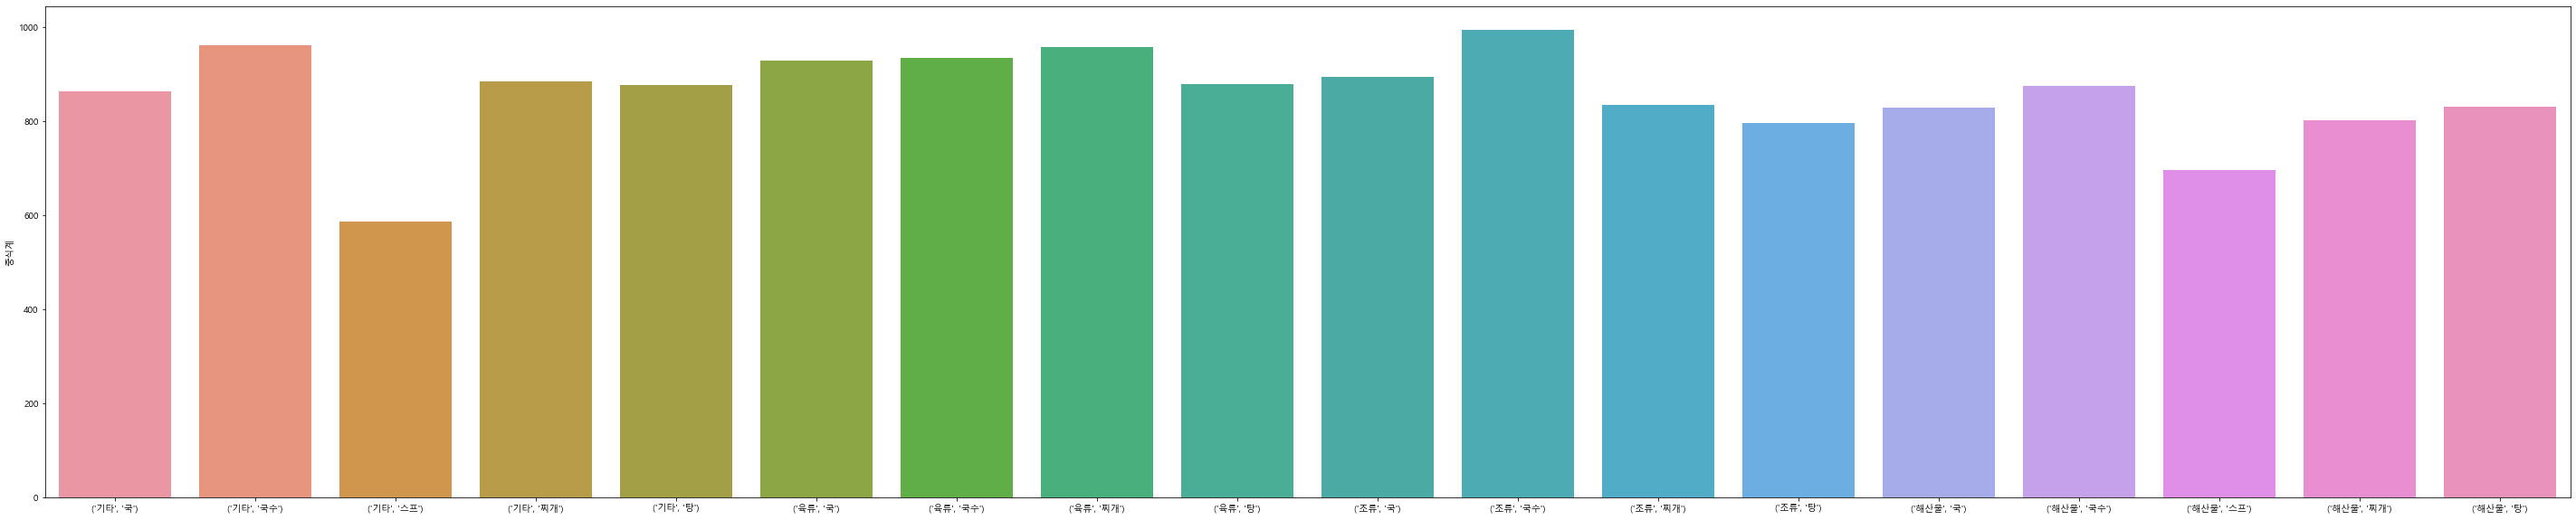

In [30]:
plt.figure(figsize=(50,10))
sns.barplot(data=df_lunch_mean,x=df_lunch_mean.index.to_numpy(), y='중식계')

plt.show()

## 저녁

In [31]:
df_dinner = pd.merge(df, df_dinner_cat, on='일자', how='left')
df_dinner.isna().sum().sum()

352

In [32]:
#df_dinner.fillna(0,inplace=True)
df_dinner.dropna(inplace=True)

df_dinner_mean = df_dinner['석식계'].groupby([df_dinner['메뉴분류'], df_dinner['국분류']]).mean()
df_dinner_mean = pd.DataFrame(df_dinner_mean)
df_dinner_mean_menu = pd.DataFrame(df_dinner['석식계'].groupby(df_dinner['메뉴분류']).mean())
df_dinner_mean_guk = pd.DataFrame(df_dinner['석식계'].groupby(df_dinner['국분류']).mean())

In [33]:
cal_anco_one('support',frequent_itemsets_dinner[frequent_itemsets_dinner['length'] ==1],'dinner') # 메뉴 많이 나온 순서대로 평균을 구함

,0,1,평균차이
0,국,478.809148,0.942654
1,육류,475.910088,-1.956407
2,해산물,472.096491,-5.770003
3,조류,480.567376,2.700881
4,탕,461.798883,-16.067612
5,찌개,469.343590,-8.522905
6,국수,505.537815,27.671321
7,기타,489.058559,11.192064
8,스프,496.030303,18.163809


In [34]:
cal_anco('lift', rules_dinner, df_dinner_mean, 'dinner')

,0,1,2,평균차이
0,기타,국수,516.780488,38.913993
1,기타,탕,506.000000,28.133506
2,해산물,찌개,474.808824,-3.057671
3,육류,국수,498.714286,20.847791
4,해산물,탕,438.280000,-39.586494
5,조류,찌개,500.388889,22.522394
6,조류,국,474.267442,-3.599053
7,기타,국,485.696000,7.829506
8,육류,국,481.897119,4.030625


In [35]:
cal_anco('support', rules_dinner, df_dinner_mean, 'dinner')

,0,1,2,평균차이
0,육류,국,481.897119,4.030625
1,조류,국,474.267442,-3.599053
2,해산물,찌개,474.808824,-3.057671
3,해산물,탕,438.280000,-39.586494
4,육류,국수,498.714286,20.847791
5,기타,국,485.696000,7.829506
6,조류,찌개,500.388889,22.522394
7,기타,탕,506.000000,28.133506
8,기타,국수,516.780488,38.913993


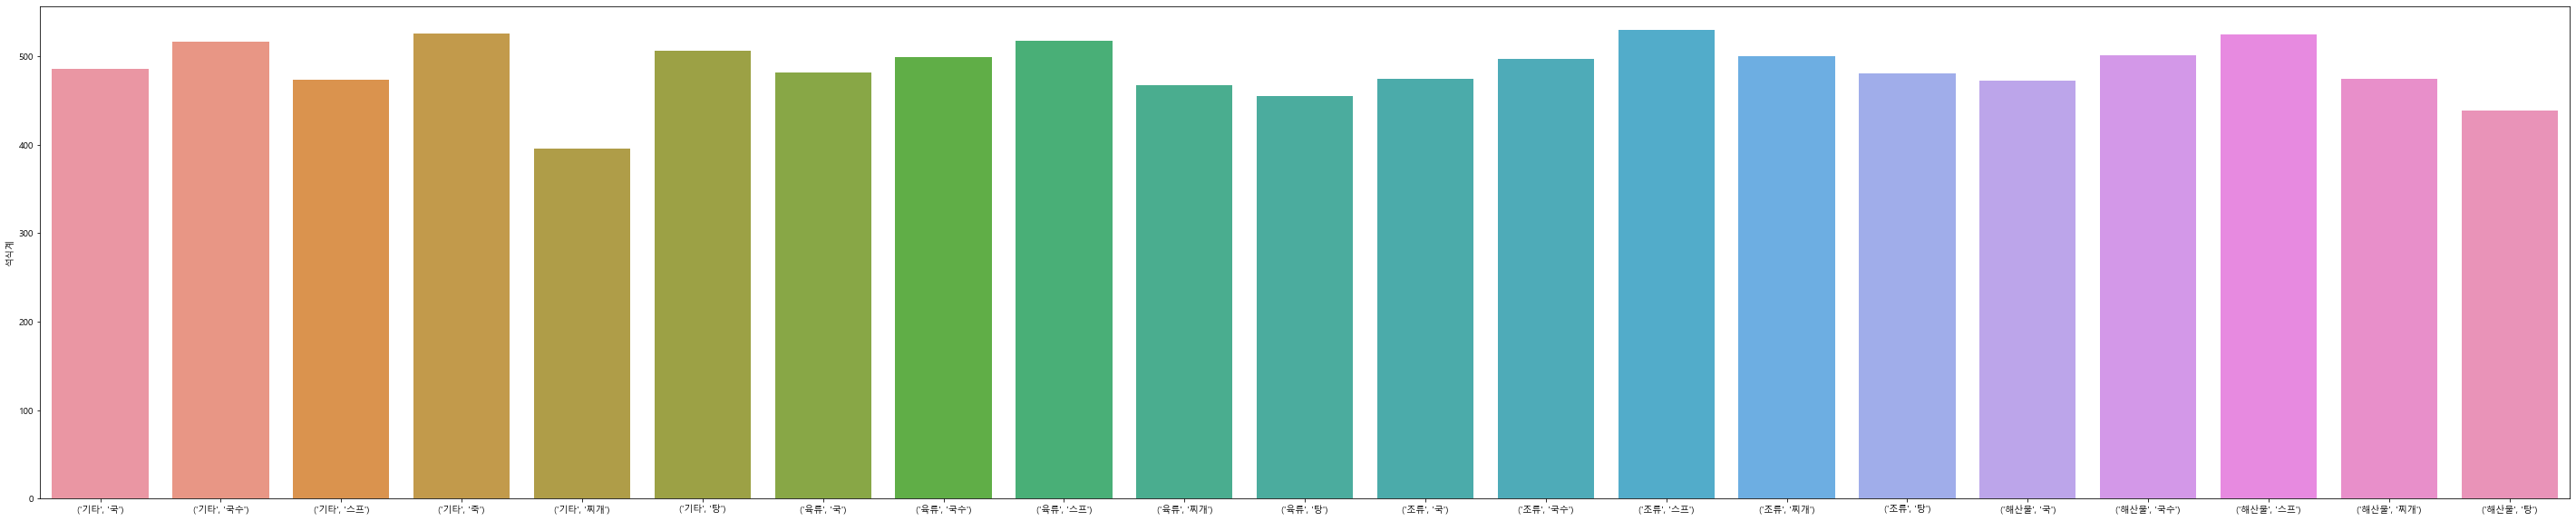

In [36]:
plt.figure(figsize=(50,10))
sns.barplot(data=df_dinner_mean,x=df_dinner_mean.index.to_numpy(), y='석식계')

plt.show()

- 이제 여기서 연관도 분석 결과와 합쳐서 보면된다.